<a href="https://colab.research.google.com/github/ahnnoah/study/blob/main/Colab/2022/3_%EC%97%AC%ED%96%89%EC%9E%90_%EC%88%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

RNN으로 여행자 수 예측, 2022년 1월 8일, 안노아

In [ ]:
# 1번 셀

# 패키지 수입
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import time

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from keras.layers import Dense, LSTM, InputLayer, SimpleRNN
from keras.models import Sequential
from sklearn.model_selection import train_test_split


In [ ]:
# 2번 셀

# 파라미터
MY_PAST = 3               # 미래 예측을 위해 사용하는 과거 데이터 수, 입력 데이터 수
MY_SPLIT = 0.8            # 학습용 데이터 비율
MY_HIDDEN = 300           # RNN 셀 내부 복잡도 = 다음 단으로 넘겨 주는 데이터 차원 수
MY_SHAPE = (MY_PAST, 1)   # RNN 입력 데이터 모양
MY_EPOCH = 300            # 반복 학습 수


     1
0  112
1  118
2  132
3  129
4  121
                1
count  144.000000
mean   280.298611
std    119.966317
min    104.000000
25%    180.000000
50%    265.500000
75%    360.500000
max    622.000000


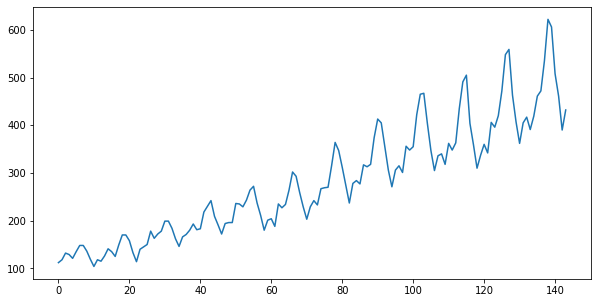

In [ ]:
# 3번 셀

# 데이터 읽기
path = '/content/drive/MyDrive/my-data/airline.csv'

data = pd.read_csv(path,
                   header=None,
                   usecols=[1])

# 샘플 출력
print(data.head(5))
print(data.describe())

# 그래프 그리기
plt.figure(figsize=(10, 5))
plt.plot(data)


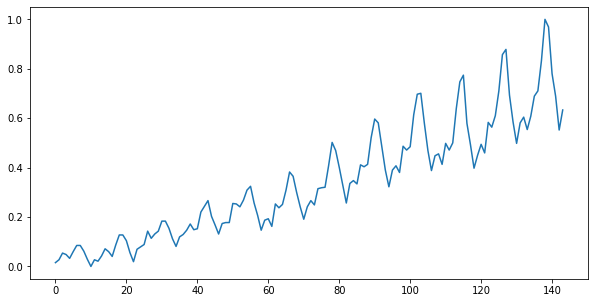

In [ ]:
# 4번 셀

# 데이터 정규화: MinMax
# data: pandas
# m_data: numpy
scaler = MinMaxScaler()
m_data = scaler.fit_transform(data)
#print('정규화 전:', data.to_numpy().flatten())
#print('정규화 후:', m_data.flatten())

# numpy를 pandas로 재전환
#m_data = pd.DataFrame(m_data)
#print(m_data.describe())
plt.figure(figsize=(10, 5))
plt.plot(m_data)


In [ ]:
# 5번 셀

# 데이터 분할
split = []
size = len(m_data)
print('데이터 수:', size)

for i in range(size - MY_PAST):
    split.append(m_data[i: i + MY_PAST + 1])

print(m_data.flatten())
print(split[0])
print(split[1])
print('총 4개 묶음 수:', len(split))


데이터 수: 144
[0.01544402 0.02702703 0.05405405 0.04826255 0.03281853 0.05984556
 0.08494208 0.08494208 0.06177606 0.02895753 0.         0.02702703
 0.02123552 0.04247104 0.07142857 0.05984556 0.04054054 0.08687259
 0.12741313 0.12741313 0.1042471  0.05598456 0.01930502 0.06949807
 0.07915058 0.08880309 0.14285714 0.11389961 0.13127413 0.14285714
 0.18339768 0.18339768 0.15444015 0.11196911 0.08108108 0.11969112
 0.12934363 0.14671815 0.17181467 0.14864865 0.15250965 0.22007722
 0.24324324 0.26640927 0.2027027  0.16795367 0.13127413 0.17374517
 0.17760618 0.17760618 0.25482625 0.25289575 0.24131274 0.26833977
 0.30888031 0.32432432 0.25675676 0.20656371 0.14671815 0.18725869
 0.19305019 0.16216216 0.25289575 0.23745174 0.25096525 0.30888031
 0.38223938 0.36486486 0.2992278  0.24131274 0.19111969 0.24131274
 0.26640927 0.24903475 0.31467181 0.31853282 0.32046332 0.40733591
 0.5019305  0.46911197 0.4015444  0.32818533 0.25675676 0.33590734
 0.34749035 0.33397683 0.41119691 0.4034749  0.4131

In [ ]:
# 6번 셀

# 분할 데이터 추가 처리
print(type(split))
split = np.array(split)
print(type(split))
print('시계열 분할 데이터 모양:', split.shape)
#print(split)

<class 'list'>
<class 'numpy.ndarray'>
시계열 분할 데이터 모양: (141, 4, 1)


In [ ]:
# 7번 셀

# 데이터 분리
X_data = split[:, 0:MY_PAST]
#print(X_data)
print('입력 데이터 모양:', X_data.shape)

Y_data = split[:, -1]
#print(split[0])
#print(X_data[0])
#print(Y_data[0])
print('출력 데이터 모양:', Y_data.shape)


입력 데이터 모양: (141, 3, 1)
출력 데이터 모양: (141, 1)


In [ ]:
# 8번 셀

# 데이터를 학습용과 평가용으로 분할
# 시계열 데이터는 결코 섞어서 사용하지 않는다!
X_train, X_test, Y_train, Y_test = train_test_split(X_data,
                                                    Y_data,
                                                    train_size=MY_SPLIT,
                                                    shuffle=False)

# 최종 데이터 모양 확인
print('학습용 입력 데이터:', X_train.shape)
print('학습용 출력 데이터:', Y_train.shape)
print('평가용 입력 데이터:', X_test.shape)
print('평가용 출력 데이터:', Y_test.shape)


학습용 입력 데이터: (112, 3, 1)
학습용 출력 데이터: (112, 1)
평가용 입력 데이터: (29, 3, 1)
평가용 출력 데이터: (29, 1)


In [ ]:
# 9번 셀

# RNN 구현
model = Sequential()

# 입력층
model.add(InputLayer(input_shape=MY_SHAPE))

# RNN 셀 추가
model.add(SimpleRNN(units=MY_HIDDEN))

# 출력층
model.add(Dense(units=1,
                activation='sigmoid'))

# RNN 요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 300)               90600     
                                                                 
 dense (Dense)               (None, 1)                 301       
                                                                 
Total params: 90,901
Trainable params: 90,901
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 10번 셀

# RNN 학습 환경 설정
model.compile(optimizer='adam',
              loss='mae')

# RNN 학습 진행
print('학습 시작')
begin = time()

model.fit(X_train,
          Y_train,
          epochs=MY_EPOCH,
          verbose=0)

end = time()
print('학습 시간:', end - begin)


학습 시작
학습 시간: 8.216530561447144


In [ ]:
# 11번 셀

# RNN 평가
score = model.evaluate(X_test,
                       Y_test)

# 이번에는 정확도 사용하지 않음
print('최종 손실값:', score)


1/1 [==============================] - 0s 228ms/step - loss: 0.0756
최종 손실값: 0.07557041943073273


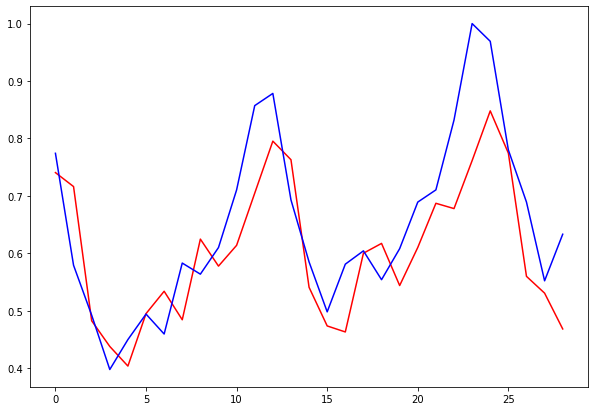

In [ ]:
# 12번 셀

# RNN으로 예측
pred = model.predict(X_test)

#print(pred)

# 그래프 그리기
plt.figure(figsize=(10, 7))
plt.plot(pred, 'r')
plt.plot(Y_test, 'b')


In [ ]:
# 13번 셀

# 데이터 역전환
# 정규화 된 데이터를 원본으로 전환
print('역전환 전:', pred.flatten())
pred = scaler.inverse_transform(pred)
print('역전환 후:', pred.flatten())

# 첫번째 평가용 문제 비교
print('RNN 예측값:', pred[0])
tmp = scaler.inverse_transform(Y_test)
print('정답:', tmp[0])


역전환 전: [0.74052703 0.7161779  0.48253343 0.4378213  0.40365928 0.4949752
 0.53391695 0.48428988 0.6247248  0.577723   0.6138786  0.7047071
 0.79529834 0.76296985 0.54075867 0.4735365  0.46306798 0.60015094
 0.61724776 0.5438878  0.61019063 0.68708825 0.67787004 0.76141804
 0.8480153  0.77442706 0.5598716  0.5306387  0.4683131 ]
역전환 후: [487.59302 474.98016 353.9523  330.79144 313.09552 360.3972  380.569
 354.86218 427.60745 403.26053 421.98914 469.03827 515.96454 499.21838
 384.113   349.2919  343.8692  414.8782  423.73434 385.7339  420.07877
 459.9117  455.1367  498.41455 543.2719  505.15323 394.01352 378.87085
 346.5862 ]
RNN 예측값: [487.59302]
정답: [505.]
